In [48]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Subset, DataLoader

import torchvision
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from torchsummary import summary
from sklearn.model_selection import StratifiedShuffleSplit

import os
import copy
import yaml
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

torch.manual_seed(0)
np.random.seed(0)

In [2]:
if not os.path.exists('./weights'):
    os.mkdir('./weights')

with open('hyperparameters.yml') as f:
    hp = yaml.safe_load(f)['hyperparameters']

In [7]:
data_path = './data'
labels_path = './data/Training400/Fovea_location.xlsx'

labels_df = pd.read_excel(labels_path)
print(labels_df.head())
print(labels_df.tail())

   ID    imgName      Fovea_X      Fovea_Y
0   1  A0001.jpg  1182.264278  1022.018842
1   2  A0002.jpg   967.754046  1016.946655
2   3  A0003.jpg  1220.206714   989.944033
3   4  A0004.jpg  1141.140888  1000.594955
4   5  A0005.jpg  1127.371832  1071.109440
      ID    imgName     Fovea_X     Fovea_Y
395  396  N0307.jpg  823.024991  690.210211
396  397  N0308.jpg  647.598978  795.653188
397  398  N0309.jpg  624.571803  755.694880
398  399  N0310.jpg  687.523044  830.449187
399  400  N0311.jpg  746.107631  759.623062


In [24]:
labels_df[labels_df['imgName'].str.startswith('A')]

,ID,imgName,Fovea_X,Fovea_Y
0,1,A0001.jpg,1182.264278,1022.018842
1,2,A0002.jpg,967.754046,1016.946655
2,3,A0003.jpg,1220.206714,989.944033
3,4,A0004.jpg,1141.140888,1000.594955
4,5,A0005.jpg,1127.371832,1071.109440
...,...,...,...,...
84,85,A0085.jpg,1181.719984,1058.496430
85,86,A0086.jpg,1034.745615,1073.474319
86,87,A0087.jpg,1099.317130,932.050025
87,88,A0088.jpg,974.981440,1008.517440


In [20]:
labels_df[labels_df['imgName'].str.startswith('N')]

,ID,imgName,Fovea_X,Fovea_Y
89,90,N0001.jpg,1279.354269,1183.022499
90,91,N0002.jpg,1306.301802,1076.883738
91,92,N0003.jpg,1288.503773,1056.753381
92,93,N0004.jpg,1425.187031,970.644242
93,94,N0005.jpg,1002.039775,1064.412086
...,...,...,...,...
395,396,N0307.jpg,823.024991,690.210211
396,397,N0308.jpg,647.598978,795.653188
397,398,N0309.jpg,624.571803,755.694880
398,399,N0310.jpg,687.523044,830.449187


Image Size: (2124, 2056)
Image Size: (2124, 2056)
Image Size: (2124, 2056)
Image Size: (2124, 2056)
Image Size: (1444, 1444)
Image Size: (2124, 2056)
Image Size: (2124, 2056)
Image Size: (1444, 1444)


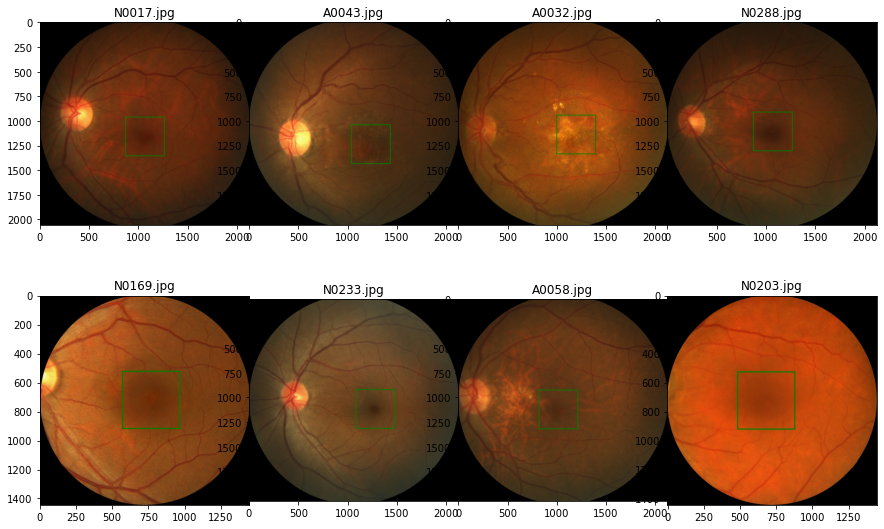

In [34]:
def load(labels_df, idx):
    img_name = labels_df['imgName']
    if img_name[idx][0] == 'A':
        label = 'AMD'
    else:
        label = 'Non-AMD'
    img_path = os.path.join(data_path, "Training400", label, img_name[idx])
    img = Image.open(img_path)
    x_coord=labels_df["Fovea_X"][idx]
    y_coord=labels_df["Fovea_Y"][idx]
    return img, (x_coord, y_coord)

def show(img, coord):
    x_coord, y_coord = coord
    draw = ImageDraw.Draw(img)
    draw.rectangle(((x_coord-200, y_coord-200), (x_coord+200, y_coord+200)),outline="green",width=8)
    plt.imshow(np.asarray(img))

plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
img_names = labels_df['imgName']
rand_idx = np.random.choice(labels_df.index, 8)

for i, idx in enumerate(rand_idx):
    img, label = load(labels_df, idx)
    print(f'Image Size: {img.size}')
    plt.subplot(2, 4, i+1)
    show(img,label)
    plt.title(img_names[idx])

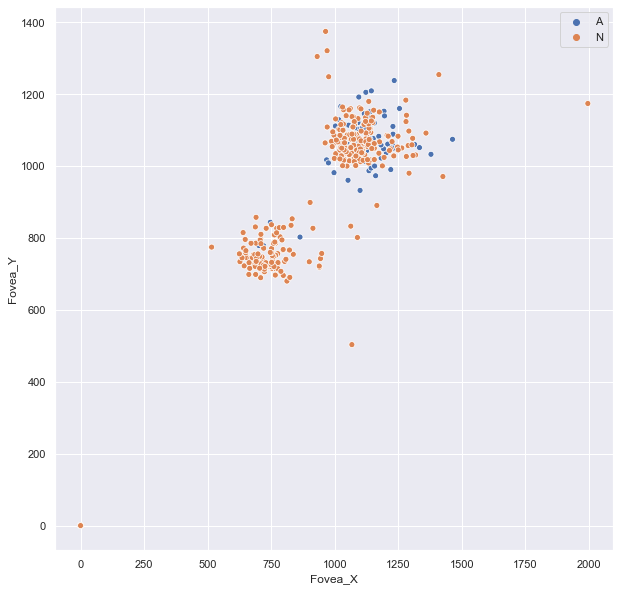

In [54]:
sns.set(rc={'figure.figsize': (10, 10)})

ARMD = [img_name[0] for img_name in img_names]
sns.scatterplot(labels_df['Fovea_X'], labels_df['Fovea_Y'], hue=ARMD)